In [1]:
import os

In [2]:
os.getcwd()

'/Users/srikaranreddy/Desktop/Spring Semester/Computer Vision 6.8300/cv-project/gi-tract-image-segmentation/notebooks'

In [3]:
os.chdir('/Users/srikaranreddy/Desktop/Spring Semester/Computer Vision 6.8300/cv-project/gi-tract-image-segmentation')

In [4]:
from src.data import SegmentationDataset

In [ ]:
sd = SegmentationDataset(dataset_dir='datasets/train', 
                         csv_file_path='datasets/train.csv')

In [ ]:
sd.processed_df.shape

In [ ]:
df = sd.processed_df

In [ ]:
from sklearn.model_selection import train_test_split
import random 

random.seed(42)

train_df, test_df = train_test_split(df, test_size=0.2)
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [ ]:
temp_df = train_df.sample(20)
temp_df = temp_df.reset_index(drop=True)

In [ ]:
CLASSES = ['small_bowel', 'large_bowel', 'stomach']
categories = sd.create_coco_categories(CLASSES)
categories

In [ ]:
temp_images = sd.create_coco_images(temp_df)
temp_images[0]

In [ ]:
temp_annotations = sd.create_annotations(temp_df, temp_images)
temp_annotations[0]

In [ ]:
import pycocotools
from pycocotools import mask
import pycocotools.mask as mask_util
import numpy as np
import json
from pycocotools.coco import COCO

In [ ]:
def np_encoder(object):
    if isinstance(object, np.generic):
        return object.item()

temp_json = {
    'categories': categories,
    'images': temp_images,
    'annotations': temp_annotations
}

with open('temp_json.json', 'w', encoding='utf-8') as f:
    json.dump(temp_json, f, ensure_ascii=True, indent=4, default=np_encoder)

In [ ]:
from pathlib import Path
annFile = Path(f'temp_json.json')
coco = COCO(annFile)
imgIds = coco.getImgIds()

In [ ]:
imgs = coco.loadImgs(imgIds)
imgs

In [ ]:
dataset_dir = '/Users/srikaranreddy/Desktop/Spring Semester/Computer Vision 6.8300/cv-project/gi-tract-image-segmentation/datasets/train'

In [ ]:
from matplotlib import pyplot as plt
from PIL import Image
imgs = coco.loadImgs(imgIds[0:2])
_, axs = plt.subplots(len(imgs), 2, figsize=(40, 15 * len(imgs)))
for img, ax in zip(imgs, axs):
    I = Image.fromarray(
        np.array(Image.open(os.path.join(dataset_dir, img['file_name']))).astype("uint16"))
    annIds = coco.getAnnIds(imgIds=[img['id']])
    anns = coco.loadAnns(annIds)
    ax[0].imshow(I)
    ax[1].imshow(I)
    plt.sca(ax[1])
    coco.showAnns(anns, draw_bbox=True)

In [ ]:
from src.data import DataGenerator

In [ ]:
temp_generator_class = DataGenerator(dataset_dir='datasets/train',
                                     batch_size=20,
                                     subset="train",
                                     classes=CLASSES,
                                     input_image_size=(128,128),
                                     annFile='temp_json.json',
                                     shuffle=True)

In [ ]:
X, y = temp_generator_class.__getitem__(0)

In [ ]:
X.shape, y.shape

In [25]:
type(temp_images[0]['width'])

int

In [61]:
batch_size = 20
image_list= imgs
indexes = np.arange(len(image_list))
classes= CLASSES
input_image_size= (128, 128)
dataset_size = len(image_list)
coco = COCO(Path(f'temp_json.json'))
catIds = coco.getCatIds(catNms=classes)  
cats = coco.loadCats(catIds)
imgIds = coco.getImgIds()
shuffle = True

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [62]:
print(catIds)
print(cats)

[0, 1, 2]
[{'id': 0, 'name': 'small_bowel'}, {'id': 1, 'name': 'large_bowel'}, {'id': 2, 'name': 'stomach'}]


In [63]:
imgIds

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [64]:
image_list

[{'id': 1,
  'file_name': 'case15/case15_day0/scans/slice_0068_266_266_1.50_1.50.png',
  'width': 266,
  'height': 266},
 {'id': 2,
  'file_name': 'case9/case9_day0/scans/slice_0099_360_310_1.50_1.50.png',
  'width': 360,
  'height': 310},
 {'id': 3,
  'file_name': 'case130/case130_day0/scans/slice_0107_266_266_1.50_1.50.png',
  'width': 266,
  'height': 266},
 {'id': 4,
  'file_name': 'case74/case74_day0/scans/slice_0091_266_266_1.50_1.50.png',
  'width': 266,
  'height': 266},
 {'id': 5,
  'file_name': 'case44/case44_day0/scans/slice_0092_266_266_1.50_1.50.png',
  'width': 266,
  'height': 266},
 {'id': 6,
  'file_name': 'case125/case125_day15/scans/slice_0066_266_266_1.50_1.50.png',
  'width': 266,
  'height': 266},
 {'id': 7,
  'file_name': 'case141/case141_day13/scans/slice_0068_266_266_1.50_1.50.png',
  'width': 266,
  'height': 266},
 {'id': 8,
  'file_name': 'case54/case54_day30/scans/slice_0039_266_266_1.50_1.50.png',
  'width': 266,
  'height': 266},
 {'id': 9,
  'file_name':

In [67]:
X = np.empty((batch_size,128,128,3))
y = np.empty((batch_size,128,128,3))

np.random.shuffle(indexes)      
index = 0
indexes = indexes[index*batch_size:(index+1)*batch_size]

In [68]:
indexes

array([ 3, 18, 17, 16,  6, 13, 19, 15,  8,  5, 12, 10,  7,  4,  1,  2, 14,
       11,  0,  9])

In [74]:
import cv2
def getImage(file_path):
    train_img = cv2.imread(os.path.join(dataset_dir, file_path), cv2.IMREAD_ANYDEPTH)
    train_img = cv2.resize(train_img, (128, 128))
    train_img = train_img.astype(np.float32) / 255.
    if (len(train_img.shape)==3 and train_img.shape[2]==3): 
        return train_img
    else: 
        stacked_img = np.stack((train_img,)*3, axis=-1)
    return stacked_img      

In [122]:
for i in range(len(indexes[:1])):
    value = indexes[i]
    img_info = image_list[value]
    w = img_info['height']
    h = img_info['width']
    X[i,] = getImage(img_info['file_name']) 
    mask_train = res

In [123]:
for j in catIds:
    y[i,:,:,j] = mask_train[j]   

In [120]:
image_id = img_info['id']
res = []  
mask = np.zeros((128, 128))
for j,categorie in enumerate(catIds):
    mask = getNormalMask(image_id,categorie)
    res.append(mask)

In [121]:
res

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)]

In [104]:
catIds

[0, 1, 2]

[16]
[{'segmentation': {'counts': [25895, 7, 258, 9, 256, 11, 254, 13, 253, 14, 251, 15, 250, 17, 249, 17, 248, 18, 248, 19, 246, 20, 246, 20, 246, 20, 245, 21, 244, 22, 243, 23, 241, 25, 239, 27, 237, 29, 236, 30, 235, 31, 234, 32, 233, 33, 232, 33, 233, 33, 232, 34, 232, 34, 232, 33, 233, 33, 232, 33, 233, 33, 234, 31, 235, 30, 237, 29, 237, 28, 239, 27, 239, 26, 240, 25, 242, 23, 243, 22, 244, 21, 245, 21, 246, 19, 247, 18, 249, 17, 249, 17, 250, 14, 253, 11, 257, 8, 32098], 'size': [266, 266]}, 'bbox': [97, 70, 49, 36], 'area': 287130, 'image_id': 4, 'category_id': 2, 'iscrowd': 0, 'id': 16}]
[{'id': 0, 'name': 'small_bowel'}, {'id': 1, 'name': 'large_bowel'}, {'id': 2, 'name': 'stomach'}]


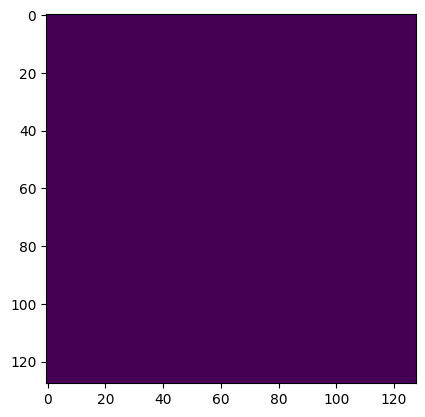

In [113]:
annIds = coco.getAnnIds(4, catIds=2, iscrowd=None)
print(annIds)
anns = coco.loadAnns(annIds)
print(anns)
cats = coco.loadCats(catIds)
print(cats)
train_mask = np.zeros((128, 128),dtype=np.uint8)
plt.imshow(train_mask)

In [114]:
className = 'stomach'
pixel_value = classes.index(className)+1
print(pixel_value)

3


In [115]:
def getClassName(classID, cats):
    for i in range(len(cats)):
        if cats[i]['id']==classID:
            return cats[i]['name']
    return None

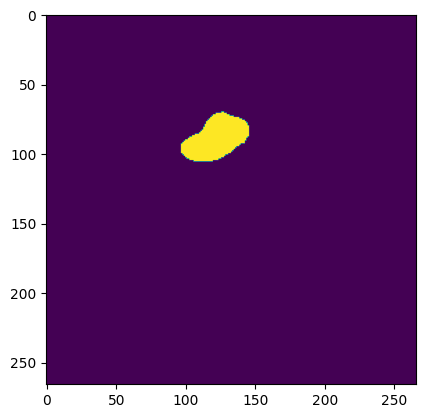

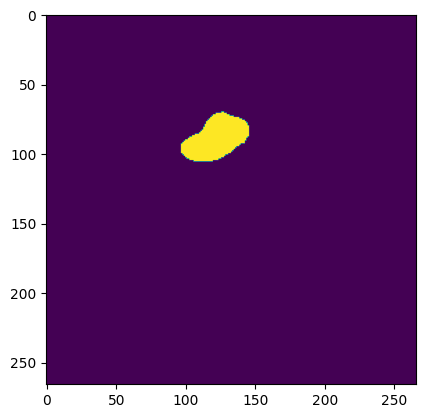

In [116]:
plt.imshow(coco.annToMask(anns[0]))
plt.show()
plt.imshow(coco.annToMask(anns[0])*pixel_value)
plt.show()

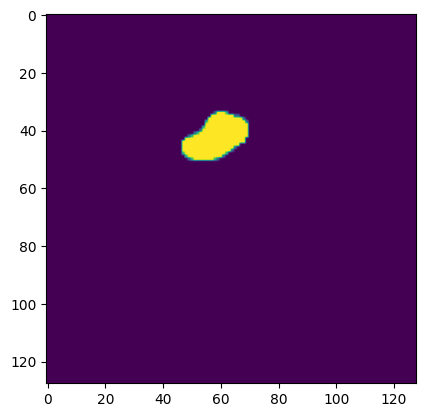

In [117]:
new_mask = cv2.resize(coco.annToMask(anns[0])*pixel_value, (128, 128))
plt.imshow(new_mask)

In [103]:
train_mask = np.maximum(new_mask, train_mask)
train_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
for a in range(len(anns)):
    className = getClassName(anns[a]['category_id'], cats)

In [118]:
input_image_size = (128, 128)
def getNormalMask(image_id, catIds):
    annIds = coco.getAnnIds(image_id, catIds=catIds, iscrowd=None)
    anns = coco.loadAnns(annIds)
    cats = coco.loadCats(catIds)
    train_mask = np.zeros((128, 128),dtype=np.uint8)
    for a in range(len(anns)):
        className = getClassName(anns[a]['category_id'], cats)
        pixel_value = classes.index(className)+1
        new_mask = cv2.resize(coco.annToMask(anns[a])*pixel_value, input_image_size)
        train_mask = np.maximum(new_mask, train_mask)
        # train_mask = new_mask / 255.0
    return train_mask  

In [40]:
# def getNormalMask(image_id,catIds):
image_id = imgs[


    annIds = coco.getAnnIds(image_id, catIds=catIds, iscrowd=None)
    anns = self.coco.loadAnns(annIds)
    cats = self.coco.loadCats(catIds)
    train_mask = np.zeros(self.input_image_size,dtype=np.uint8)
    for a in range(len(anns)):
        className = self.getClassName(anns[a]['category_id'], cats)
        pixel_value = self.classes.index(className)+1
        new_mask = cv2.resize(self.coco.annToMask(anns[a])*pixel_value, self.input_image_size)
        train_mask = np.maximum(new_mask, train_mask)
        # train_mask = new_mask / 255.0
    return train_mask     

array([12,  5, 16, 17, 15,  0,  1, 18,  8,  3,  2,  6,  7, 19,  4, 14, 11,
        9, 13, 10])

In [40]:
indexes = np.arange(len(temp_images))
coco = COCO(temp_annotations)

loading annotations into memory...


TypeError: expected str, bytes or os.PathLike object, not list

In [29]:
filepath = sd.processed_df['file_path'].unique().tolist()[0]

In [30]:
filepath

'datasets/train/case123/case123_day20/scans/slice_0065_266_266_1.50_1.50.png'

In [32]:
file_id = ('_'.join(
            (filepath.split("/")[-3] + "_" + filepath.split("/")[-1]).split("_")[:-4]))

file_id

'case123_day20_slice_0065'